In [212]:
# import modules
import spikeinterface as si
import spikeinterface.extractors as se 
import spikeinterface.toolkit as st
import spikeinterface.sorters as ss
import spikeinterface.comparison as sc
import spikeinterface.widgets as sw
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import widgets as wd
%matplotlib inline

In [53]:
# Loading recording and Probe Information
# RecodingExtractor: spikeinterface.extractors.neoextractors.blackrock.BlackrockRecordingExtractor
spike_data = wd.read_ns4datafile('spike_data1.ns4')
print (spike_data[0]['elec_ids'])
for key in spike_data[0]:
    print(key)


spike_data1.ns4 opened

spike_data1.ns4 closed
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
elec_ids
start_time_s
data_time_s
downsample
data
data_headers
ExtendedHeaderIndices
samp_per_s


In [26]:
print(spike_data)

({'elec_ids': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], 'start_time_s': 0.0, 'data_time_s': 120.01, 'downsample': 1, 'data': array([[ -8.  ,  -7.  ,   6.  , ...,  10.  ,   2.25, -10.  ],
       [ -5.75,  -0.25,   9.  , ...,   8.  ,  -0.75,  -2.75],
       [  8.25,  17.5 ,   5.25, ..., -10.  ,   3.5 ,   2.75],
       ...,
       [-12.  ,  -2.5 ,   1.75, ...,   9.25,  -4.5 ,   1.25],
       [-10.5 ,  -4.25,   5.  , ...,  11.5 ,  -0.25,   7.5 ],
       [-15.5 ,  -3.75,   9.  , ...,   7.  ,   0.25,   5.25]],
      dtype=float32), 'data_headers': [{'Header': 1, 'Timestamp': 0, 'NumDataPoints': 1200100}], 'ExtendedHeaderIndices': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], 'samp_per_s': 10000.0}, 'uV')


In [29]:
# spikeinterface.extractors.neoextractors.blackrock.BlackrockRecordingExtractor
se.recording_extractor_full_list

[spikeinterface.core.binaryrecordingextractor.BinaryRecordingExtractor,
 spikeinterface.core.numpyextractors.NumpyRecording,
 spikeinterface.extractors.shybridextractors.SHYBRIDRecordingExtractor,
 spikeinterface.extractors.mdaextractors.MdaRecordingExtractor,
 spikeinterface.extractors.neoextractors.mearec.MEArecRecordingExtractor,
 spikeinterface.extractors.neoextractors.spikeglx.SpikeGLXRecordingExtractor,
 spikeinterface.extractors.neoextractors.openephys.OpenEphysLegacyRecordingExtractor,
 spikeinterface.extractors.neoextractors.openephys.OpenEphysBinaryRecordingExtractor,
 spikeinterface.extractors.neoextractors.intan.IntanRecordingExtractor,
 spikeinterface.extractors.neoextractors.neuroscope.NeuroScopeRecordingExtractor,
 spikeinterface.extractors.neoextractors.plexon.PlexonRecordingExtractor,
 spikeinterface.extractors.neoextractors.neuralynx.NeuralynxRecordingExtractor,
 spikeinterface.extractors.neoextractors.blackrock.BlackrockRecordingExtractor,
 spikeinterface.extractors.

In [34]:
# extract recording and load its information
recording = se.BlackrockRecordingExtractor('spike_data1.ns4')
channel_ids = recording.get_channel_ids()
fs = recording.get_sampling_frequency()
num_chan = recording.get_num_channels()
num_segments = recording.get_num_segments()

print(f'Channel ids: {channel_ids}')
print(f'Sampling frequency: {fs}')
print(f'Number of channels: {num_chan}')
print(f"Number of segments: {num_segments}")

Channel ids: ['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32']
Sampling frequency: 10000.0
Number of channels: 32
Number of segments: 1


In [35]:
# TxN numpy array where N = # channel ids passed in (all ids  passed by default) and T = # of frames (determined by start_frame and end_frame)
trace_snippet = recording.get_traces(start_frame=int(fs*0), end_frame=int(fs*2))

In [36]:
# Get Traces
print('Traces shape:', trace_snippet.shape)

Traces shape: (20000, 32)


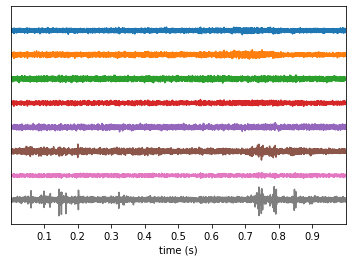

In [209]:
# widgets to plot data
w_ts = sw.plot_timeseries(recording, channel_ids=['1', '2', '3', '4', '5', '6', '7', '8'])

In [40]:
# Make our custom probe
import probeinterface as pi
from probeinterface import plotting

In [58]:
from probeinterface import Probe
from probeinterface.plotting import plot_probe

In [59]:
# Make custom probe specifications
n = 32
positions = np.zeros((n, 2))
for i in range(n):
    x = i // 8
    y = i % 8
    positions[i] = x, y
positions *= 20
positions[8:16, 1] -= 10

In [60]:
probe = Probe(ndim=2, si_units='um')
probe.set_contacts(positions=positions, shapes='circle', shape_params={'radius': 5})

In [61]:
print(probe)

Probe - 32ch - 1shanks


In [62]:
polygon = [(-20, -30), (20, -110), (60, -30), (60, 190), (-20, 190)]
probe.set_planar_contour(polygon)

In [63]:
# visualize probe info
df = probe.to_dataframe()
df

,x,y,contact_shapes,radius,shank_ids,contact_ids
0,0.0,0.0,circle,5.0,,
1,0.0,20.0,circle,5.0,,
2,0.0,40.0,circle,5.0,,
3,0.0,60.0,circle,5.0,,
4,0.0,80.0,circle,5.0,,
5,0.0,100.0,circle,5.0,,
6,0.0,120.0,circle,5.0,,
7,0.0,140.0,circle,5.0,,
8,20.0,-10.0,circle,5.0,,
9,20.0,10.0,circle,5.0,,


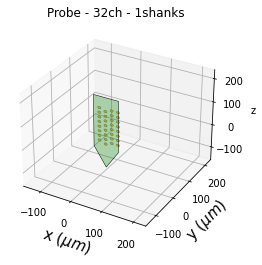

In [65]:
probe_3d = probe.to_3d(plane='xz')
plot_probe(probe_3d)

plt.show()

(<matplotlib.collections.PolyCollection at 0x21ae68318b0>,
 <matplotlib.collections.PolyCollection at 0x21ae68ac760>)

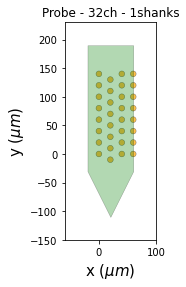

In [66]:
plotting.plot_probe(probe, with_contact_id=True, with_device_index=True)

(<matplotlib.collections.PolyCollection at 0x21ae6927820>,
 <matplotlib.collections.PolyCollection at 0x21ae6978b20>)

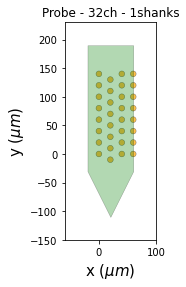

In [70]:
# plot the probe
plotting.plot_probe(probe, with_contact_id=True, with_device_index=True)

In [103]:
# Create artificial shank indices
probe.to_dataframe(complete=True).loc[:, ["contact_ids", "shank_ids", "device_channel_indices"]]
channel_indices = np.arange(32)
probe.set_device_channel_indices(channel_indices)
shank_indices = np.arange(32)
shank_indices[0:7] = 0
shank_indices[8:15] = 1
shank_indices[16:23] = 2
shank_indices[24:31] = 3
shank_indices[7] = 0
shank_indices[15] = 1
shank_indices[23] = 2
shank_indices[31] = 3
print(shank_indices)
probe.set_shank_ids(shank_indices)
print(probe.device_channel_indices)
print(probe.shank_ids)
recording_prb = recording.set_probe(probe, group_mode="by_shank")


[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
['0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '1' '1' '1' '1' '1' '1' '2' '2'
 '2' '2' '2' '2' '2' '2' '3' '3' '3' '3' '3' '3' '3' '3']


In [104]:
probe_rec = recording_prb.get_probe()
probe_rec.to_dataframe(complete=True).loc[:, ["contact_ids", "shank_ids", "device_channel_indices"]]

,contact_ids,shank_ids,device_channel_indices
0,,0,0
1,,0,1
2,,0,2
3,,0,3
4,,0,4
5,,0,5
6,,0,6
7,,0,7
8,,1,8
9,,1,9


In [105]:
print(f'Channels after loading the probe file: {recording_prb.get_channel_ids()}')
print(f'Channel groups after loading the probe file: {recording_prb.get_channel_groups()}')

Channels after loading the probe file: ['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32']
Channel groups after loading the probe file: [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3]


In [107]:
print("Properties before loading the probe:", list(recording.get_property_keys()))
print("Properties after loading the probe:", list(recording_prb.get_property_keys()))

Properties before loading the probe: ['gain_to_uV', 'offset_to_uV']
Properties after loading the probe: ['gain_to_uV', 'offset_to_uV', 'contact_vector', 'location', 'group']


In [108]:
# Properties of Recording extractor
brain_area_property_values = ['CA1']*16 + ['CA3']*16
print(brain_area_property_values)

['CA1', 'CA1', 'CA1', 'CA1', 'CA1', 'CA1', 'CA1', 'CA1', 'CA1', 'CA1', 'CA1', 'CA1', 'CA1', 'CA1', 'CA1', 'CA1', 'CA3', 'CA3', 'CA3', 'CA3', 'CA3', 'CA3', 'CA3', 'CA3', 'CA3', 'CA3', 'CA3', 'CA3', 'CA3', 'CA3', 'CA3', 'CA3']


In [109]:
recording_prb.set_property(key='brain_area', values=brain_area_property_values)

In [110]:
recording_prb.set_property(key='quality', values=["good"]*(recording_prb.get_num_channels() - 3),
                           ids=recording_prb.get_channel_ids()[:-3])

In [111]:
recording_prb.get_property("quality")

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', '', '', ''], dtype='<U4')

In [112]:
print("Properties after adding custom properties:", list(recording_prb.get_property_keys()))


Properties after adding custom properties: ['gain_to_uV', 'offset_to_uV', 'contact_vector', 'location', 'group', 'brain_area', 'quality']


In [113]:
print(recording_prb._properties.keys())

dict_keys(['gain_to_uV', 'offset_to_uV', 'contact_vector', 'location', 'group', 'brain_area', 'quality'])


In [114]:
# annotations for objects
recording_prb.annotate(description="Dataset for SI 0.90 tutorial")

In [115]:
print(recording_prb.get_annotation_keys())

['is_filtered', 'probe_0_planar_contour', 'description']


In [116]:
# filter the recordings and apply Common Media References (CMR)
recordings_by_group = recording_prb.split_by("group")
print(recordings_by_group)

{0: ChannelSliceRecording: 8 channels - 1 segments - 10.0kHz - 120.010s, 1: ChannelSliceRecording: 8 channels - 1 segments - 10.0kHz - 120.010s, 2: ChannelSliceRecording: 8 channels - 1 segments - 10.0kHz - 120.010s, 3: ChannelSliceRecording: 8 channels - 1 segments - 10.0kHz - 120.010s}


In [122]:
recording_to_process = recordings_by_group[0]
print(recording_to_process)

ChannelSliceRecording: 8 channels - 1 segments - 10.0kHz - 120.010s


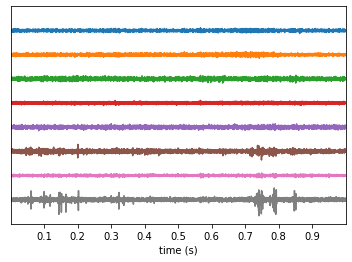

In [127]:
# bandpass filter and apply CMR to the original recording
recording_f = st.bandpass_filter(recording_to_process, freq_min=300, freq_max=3000)

w = sw.plot_timeseries(recording_f)

In [128]:
#apply CMR to increase quality
recording_cmr = st.common_reference(recording_f, reference='global', operator='median')

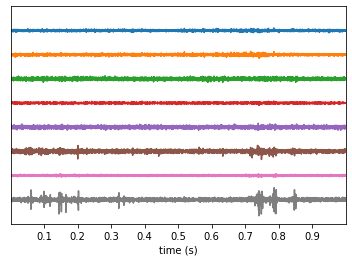

In [129]:
w = sw.plot_timeseries(recording_cmr)

In [144]:
# get a segment of the data using frame slice to speed up processes
fs = recording_cmr.get_sampling_frequency()
print(fs)
sf = fs*0
ef = fs*100
print(sf)
print(ef)
recording_sub = recording_cmr.frame_slice(sf, fs)

10000.0
0.0
1000000.0


In [172]:
# save to a file
recording_saved = recording_sub.save(folder="preprocessed", progress_bar=True, 
                                     n_jobs=4, total_memory="100M")

AssertionError: folder preprocessed already exists, choose enother name

In [151]:
print(f'Cached channels ids: {recording_saved.get_channel_ids()}')
print(f'Channel groups after caching: {recording_saved.get_channel_groups()}')

Cached channels ids: ['1' '2' '3' '4' '5' '6' '7' '8']
Channel groups after caching: [0 0 0 0 0 0 0 0]


In [152]:
# load into a new session
recording_loaded = si.load_extractor("preprocessed/")

In [153]:
print(f'Loaded channels ids: {recording_loaded.get_channel_ids()}')
print(f'Channel groups after loading: {recording_loaded.get_channel_groups()}')

Loaded channels ids: ['1' '2' '3' '4' '5' '6' '7' '8']
Channel groups after loading: [0 0 0 0 0 0 0 0]


Text(0.5, 1.0, 'Loaded')

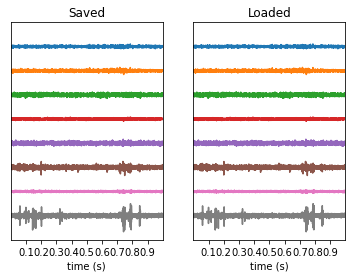

In [154]:
# check loaded and saved are same
fig, axs = plt.subplots(ncols=2)
w_saved = sw.plot_timeseries(recording_saved, ax=axs[0])
w_loaded = sw.plot_timeseries(recording_loaded, ax=axs[1])
axs[0].set_title("Saved")
axs[1].set_title("Loaded")

In [161]:
# check installed spike sorters
ss.installed_sorters()

['herdingspikes']

In [174]:
# install ironclust (MATLAB)
!git clone https://github.com/flatironinstitute/ironclust

Cloning into 'ironclust'...


In [175]:
ss.IronClustSorter.set_ironclust_path('./ironclust')

Setting IRONCLUST_PATH environment variable for subprocess calls to: c:\Users\Josh\Documents\Neuro Lab\ironclust


In [176]:
ss.IronClustSorter.ironclust_path

'c:\\Users\\Josh\\Documents\\Neuro Lab\\ironclust'

In [178]:
ss.installed_sorters()

['herdingspikes', 'ironclust']

In [179]:
# run spike sorting by group
sorting_IC = ss.run_ironclust(recording_saved, 
                              output_folder='results_IC',
                              verbose=True)
print(f'IronClust found {len(sorting_IC.get_unit_ids())} units')

Warning! The recording is already filtered, but ironclust filter is enabled
write_binary_recording with n_jobs 1  chunk_size 31250000
channels = 8, timepoints = 10000, duration = 0.016666666666666666 minutes
Creating argfile.txt...
Running ironclust in c:\Users\Josh\Documents\Neuro Lab\results_IC\tmp...
RUNNING SHELL SCRIPT: results_IC\run_ironclust.bat


c:\Users\Josh\Documents\Neuro Lab>c:



c:\Users\Josh\Documents\Neuro Lab>cd c:\Users\Josh\Documents\Neuro Lab\results_IC\tmp 



c:\Users\Josh\Documents\Neuro Lab\results_IC\tmp>matlab -nosplash -wait -log -r run_ironclust 


IronClust Version: 2


Removed 0 lock(s).

Running irc2.m (5.9.8)

Created c:\Users\Josh\Documents\Neuro Lab\results_IC\tmp\raw_geom.prm

Read c:\Users\Josh\Documents\Neuro Lab\results_IC\ironclust_dataset\raw.mda (1/1), took 0.0s (229.7 MB/s, 0.2 MB)

	get_prinvec_: took 0.3s

	Detecting 1/1: 316 spikes found (397.2 spikes/s, 0.2 MB/s, took 0.8 s)

Detection took 0.9s and used 0.111 GiB (fParfor=0, fGpu=1)

Sav

In [180]:
# see returned object's functions
print(f'Ironclust unit ids: {sorting_IC.get_unit_ids()}')

Ironclust unit ids: [0 1 2]


In [208]:
print(f'Spike train of a unit: {sorting_IC.get_unit_spike_train(2)}')


Spike train of a unit: [  66  194  204  318  461  515  558  587  605  621  631  647  664  798
  839  862  914  998 1011 1021 1029 1048 1069 1081 1126 1176 1239 1367
 1435 1441 1452 1461 1473 1492 1515 1534 1544 1630 1649 1662 1686 1747
 1754 1816 1949 1993 2003 2023 2036 2051 2108 2270 2586 2789 2805 2839
 2993 3204 3231 3381 3469 3553 3644 3665 3685 3862 4108 4215 4288 4374
 4422 4646 5578 5614 5618 5753 6032 6116 6337 6508 6727 7042 7118 7124
 7146 7154 7159 7182 7209 7231 7249 7266 7302 7326 7345 7357 7378 7391
 7394 7406 7417 7423 7429 7434 7463 7475 7487 7492 7497 7505 7525 7549
 7625 7633 7727 7746 7760 7786 7813 7839 7844 7861 7867 7877 7883 7887
 7907 7920 7924 7930 7942 7987 8135 8149 8318 8394 8466 8471 8479 8487
 8495 8514 8529 8933 9207 9296 9514 9548 9776 9824 9854 9914]


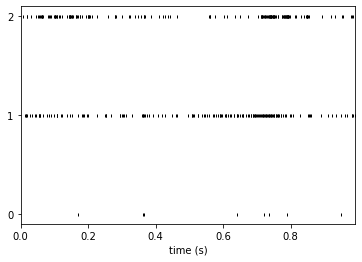

In [210]:
# spikewidgets for visualization
w_rs = sw.plot_rasters(sorting_IC)


In [184]:
# Extract Waveforms and Store
we = si.extract_waveforms(recording_saved, sorting_IC, folder="wf_IC", progress_bar=True,
                          n_jobs=1, total_memory="500M", overwrite=True)
print(we)

extract waveforms: 100%|##########| 1/1 [00:00<00:00, 28.36it/s]

WaveformExtractor: 8 channels - 3 units - 1 segments
  before:30 after40 n_per_units: 500


In [185]:
# Retrieve
waveforms0 = we.get_waveforms(unit_id=0)
print(f"Waveforms shape: {waveforms0.shape}")
template0 = we.get_template(unit_id=0)
print(f"Template shape: {template0.shape}")
all_templates = we.get_all_templates()
print(f"All templates shape: {all_templates.shape}")

Waveforms shape: (8, 70, 8)
Template shape: (70, 8)
All templates shape: (3, 70, 8)


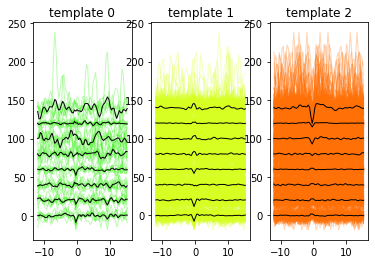

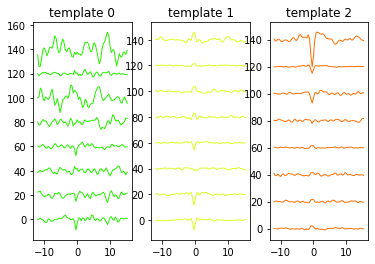

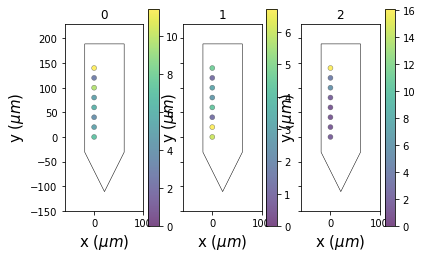

In [186]:
# Plot spike sorting output
w = sw.plot_unit_waveforms(we, unit_ids=[0,1,2])
w = sw.plot_unit_templates(we, unit_ids=[0,1,2])
w = sw.plot_unit_probe_map(we, unit_ids=[0,1,2])

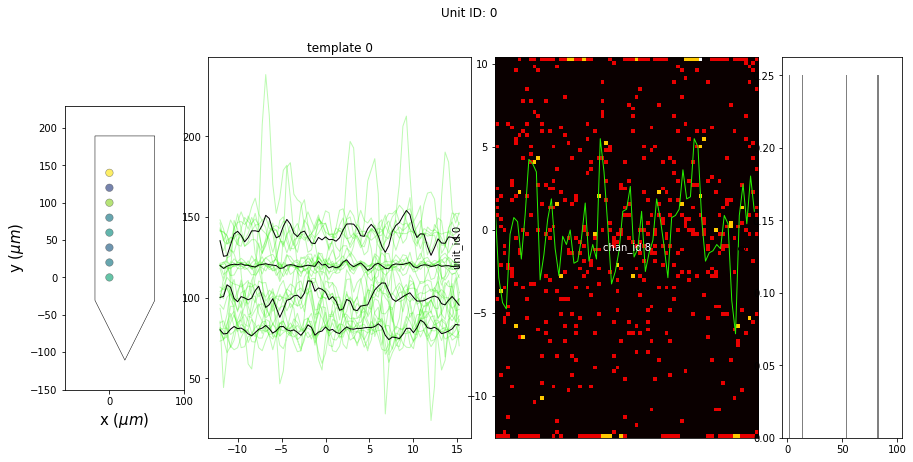

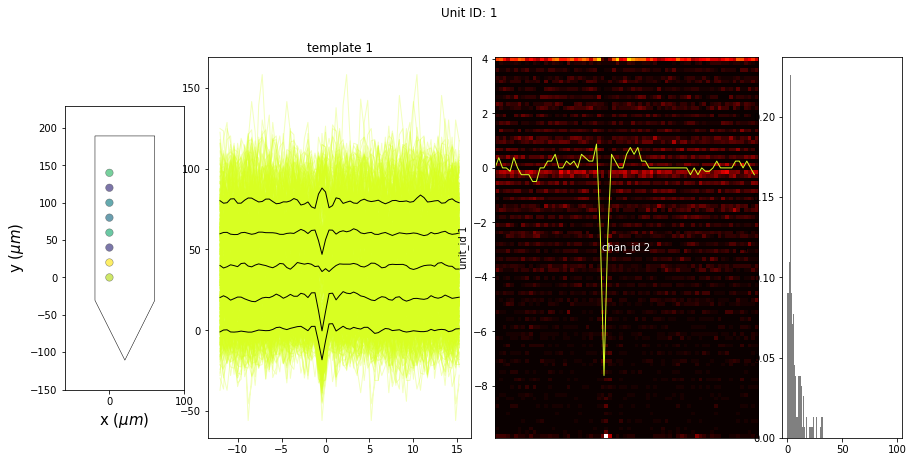

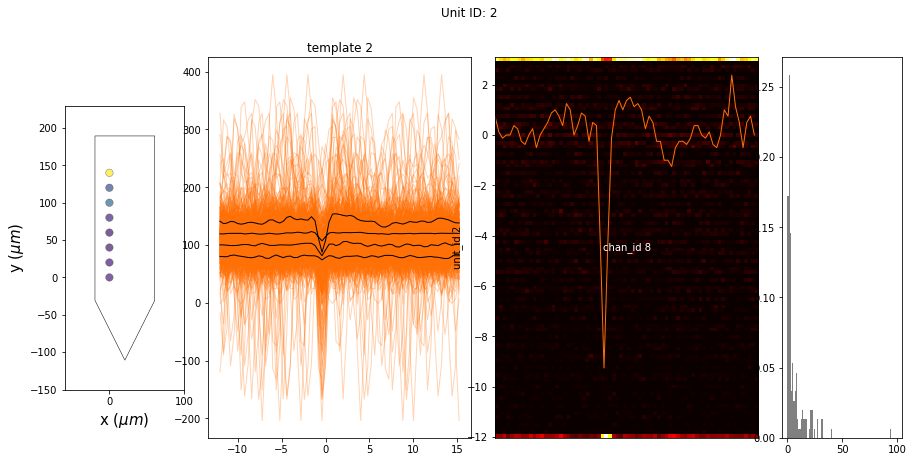

In [187]:
# Plot spike sorting output
w = sw.plot_unit_summary(we, unit_id=0)
w = sw.plot_unit_summary(we, unit_id=1)
w = sw.plot_unit_summary(we, unit_id=2)

In [189]:
# check spike number for other waveforms
for unit in sorting_IC.get_unit_ids():
    waveforms = we.get_waveforms(unit_id=unit)
    spiketrain = sorting_IC.get_unit_spike_train(unit)
    print(f"Unit {unit} - num waveforms: {waveforms.shape[0]} - num spikes: {len(spiketrain)}")

Unit 0 - num waveforms: 8 - num spikes: 8
Unit 1 - num waveforms: 156 - num spikes: 156
Unit 2 - num waveforms: 152 - num spikes: 152


In [190]:
# extract waveforms on all spikes
we_all = si.extract_waveforms(recording_saved, sorting_IC, folder="wf_IC_all", 
                              max_spikes_per_unit=None, progress_bar=True)

extract waveforms: 100%|##########| 1/1 [00:00<00:00, 33.28it/s]


In [191]:
for unit in sorting_IC.get_unit_ids():
    waveforms = we_all.get_waveforms(unit_id=unit)
    spiketrain = sorting_IC.get_unit_spike_train(unit)
    print(f"Unit {unit} - num waveforms: {waveforms.shape[0]} - num spikes: {len(spiketrain)}")

Unit 0 - num waveforms: 8 - num spikes: 8
Unit 1 - num waveforms: 156 - num spikes: 156
Unit 2 - num waveforms: 152 - num spikes: 152


In [192]:
# Postprocessing
# PCA Scores
pc = st.compute_principal_components(we, n_components=3)

In [193]:
pc0 = pc.get_components(unit_id=0)
print(f"PC scores shape: {pc0.shape}")
all_labels, all_pcs = pc.get_all_components()
print(f"All PC scores shape: {all_pcs.shape}")

PC scores shape: (8, 3, 8)
All PC scores shape: (316, 3, 8)


In [194]:
# Spike Amplitudes
amplitudes = st.get_spike_amplitudes(we, outputs="concatenated", progress_bar=True)

extract amplitudes: 100%|##########| 1/1 [00:00<00:00, 249.56it/s]


In [195]:
all_spike_times, all_spike_labels = sorting_IC.get_all_spike_trains()[0]

In [196]:
print(st.get_template_metric_names())


['peak_to_valley', 'peak_trough_ratio', 'half_width', 'repolarization_slope', 'recovery_slope']


In [200]:
# compute Template Metrics
template_metrics = st.calculate_template_metrics(we)
display(template_metrics)

,peak_to_valley,peak_trough_ratio,half_width,repolarization_slope,recovery_slope
0,0.0052,-0.97541,None,38500.0,-26651.785714
1,0.0006,-0.188944,None,NaN,-1501.259218
2,0.0004,-0.266517,0.0004,80312.497504,-3718.280196
